# Lista de Exercícios I

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 29/01/2021

In [3]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Vamos começar definindo as constantes e nossa onda quadrada (vamos usar `scipy.signal` para criar a onda quadrada):

In [13]:
N = 1000

def square_wave(n):
    return signal.square(2 * np.pi * n)

Criamos um array vazio para armazenar os valores de nossa onda quadrada:

In [31]:
vals = []

for i in np.linspace(0, 2, N):
    sw = square_wave(i)
    vals.append(sw)

Definimos a nossa função `dft` (disponível no Newman) para calcular a Transformada Discreta de Fourier (DFT):

In [32]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
            
    return c

Agora usamos a DFT:

In [33]:
c = dft(vals)

Como de costume, criamos uma função para melhorar um pouco a estética dos plots:

In [34]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Por fim, vamos ao plot...

<IPython.core.display.Javascript object>


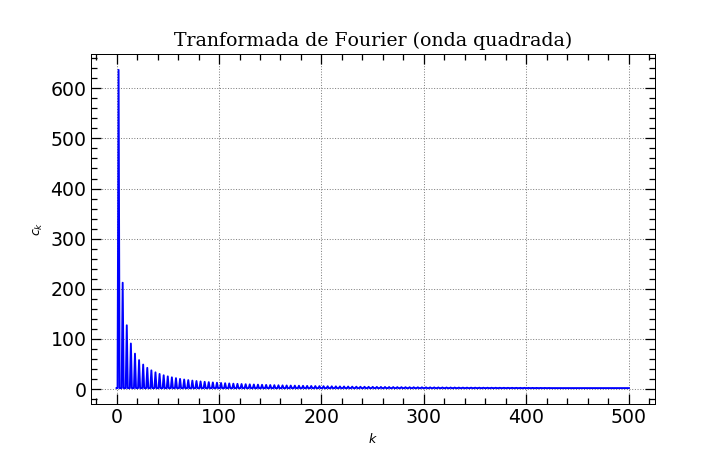

In [35]:
plt.figure(figsize=(8,5))

plt.plot(abs(c), color='blue')
plt.title('Tranformada de Fourier (onda quadrada)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.ylabel(r'$c_{k}$')
opt_plot()

### Letra b)

Primeiro definimos a nossa função senoidal modulada:

$$y_{n}=\sin{\Bigg(\frac{\pi n}{N}\Bigg)}\sin{\Bigg(\frac{10\pi n}{N}\Bigg)}$$

In [36]:
def sine_wave(n):
    return np.sin((np.pi*n)/N) * np.sin((10*np.pi*n)/N)

Analogamente ao que foi feito no item anterior:

In [37]:
vals = []

for i in np.linspace(0, 2, N):
    sw2 = sine_wave(i)
    vals.append(sw2)

c = dft(vals)

Agora plotamos a DTF:

<IPython.core.display.Javascript object>


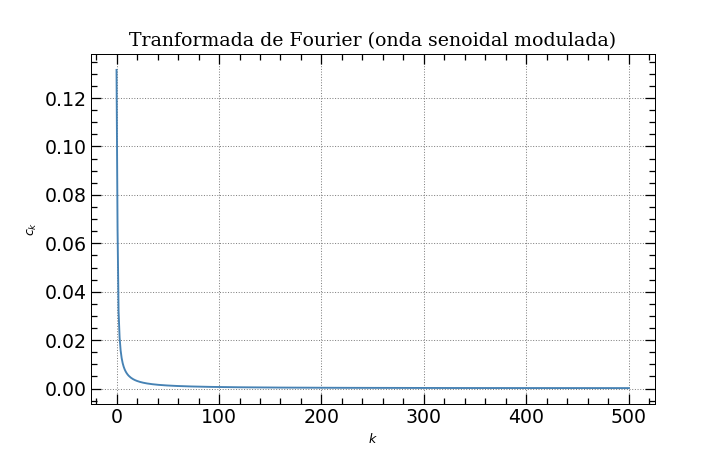

In [38]:
plt.figure(figsize=(8,5))

plt.plot(abs(c), color='steelblue')
plt.title('Tranformada de Fourier (onda senoidal modulada)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.ylabel(r'$c_{k}$')
opt_plot()

$\text{ }$

## Problema 2

### Letra a)